## 3. Distribuciones

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [3]:
dataset = pandas.read_csv('hfi_cc_2018.csv')

In [4]:
important_cols = ['year', 'ISO_code', 'countries', 'region']
important_cols += [col for col in dataset.columns if 'pf_identity' in col]
important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [5]:
w_dataset = dataset[important_cols]
w_dataset.head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


In [6]:
## Filtro por pf_identity remuevo los valores NaN
pf_identity_cleaned = w_dataset['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_cleaned.describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

In [7]:
## Filtro Latam por region Latinoamerica y Caribe
latam = w_dataset[w_dataset['region'] == 'Latin America & the Caribbean']
## Filtro por pf_identity y remuevo valores NaN
pf_identity_latam_cleaned = latam['pf_identity'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
pf_identity_latam_cleaned.describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

**- Histograma de Distribucion de la variable *pf_identity***

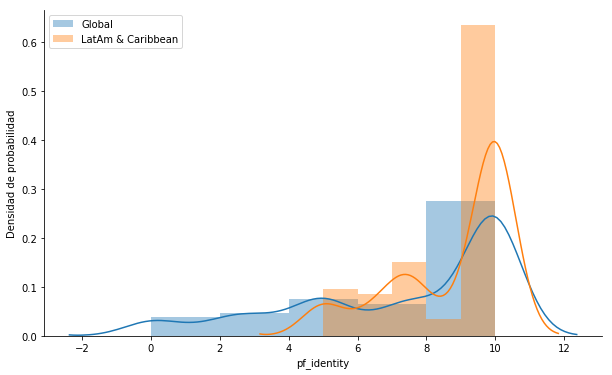

In [8]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "pf_identity" a nivel Global 
seaborn.distplot(pf_identity_cleaned, kde=True, bins=5, label='Global')

## Grafico la distribucion del puntaje "pf_identity" a nivel LatinoAmerica y Caribe 
seaborn.distplot(pf_identity_latam_cleaned, kde=True, bins=5, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

In [9]:
## Filtro por hf_score remuevo los valores NaN
hf_score_cleaned = w_dataset['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_cleaned.describe()

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

In [10]:
## Filtro Latam por hf_score y remuevo valores NaN
hf_score_latam_cleaned = latam['hf_score'].dropna()
## Una pequeña descripcion para saber con que valores estoy tratando
hf_score_latam_cleaned.describe()

count    232.000000
mean       7.047982
std        0.608904
min        4.200724
25%        6.779311
50%        7.028045
75%        7.339903
max        8.290152
Name: hf_score, dtype: float64

**- Histograma de Distribucion de la variable *hf_score***

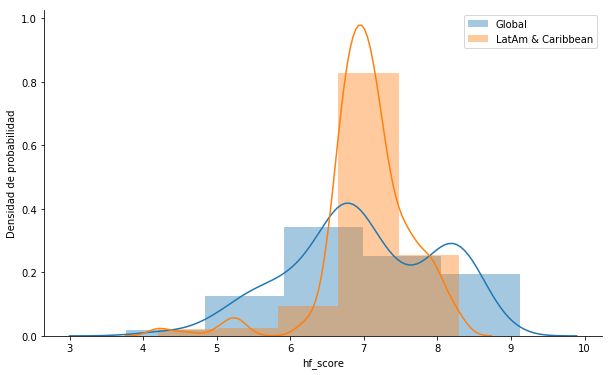

In [12]:
plt.figure(figsize=(10,6))

## Grafico la distribucion del puntaje "hf_score" a nivel Global 
seaborn.distplot(hf_score_cleaned, kde=True, bins=5, label='Global')

## Grafico la distribucion del puntaje "hf_score" a nivel LatinoAmerica y Caribe 
seaborn.distplot(hf_score_latam_cleaned, kde=True, bins=5, label='LatAm & Caribbean')
seaborn.despine()

plt.ylabel('Densidad de probabilidad')
plt.legend()

**1. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?**

Parecería ser de distribucion Normal: mas sesgada en el caso de *pf_identity*. Mientras que en el caso de *hf_score*, la curva se asemeja más a una campana de Gauss "clásica".

Se podría tomar una muestra sin necesidad de usar todos los registros, siempre y cuando sea lo suficientemente grande como para que sea reprensentativa.

In [13]:
from scipy import stats
from sklearn import preprocessing
## Prueba de Kolmogorov-Smirnof para *pf_identity* (latam)
pf_identity_latam_cleaned_norm = preprocessing.scale(pf_identity_latam_cleaned)
stats.kstest(pf_identity_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.3513672528496658, pvalue=4.08023938470139e-26)

In [15]:
## Prueba de Kolmogorov-Smirnof para *hf_score* (latam)
hf_score_latam_cleaned_norm = preprocessing.scale(hf_score_latam_cleaned)
stats.kstest(hf_score_latam_cleaned_norm, 'norm')

KstestResult(statistic=0.15003247403280606, pvalue=5.043599840583937e-05)

**2. Prueba de Kolmogorov-Smirnof**

